In [2]:
#All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62

#Note: If your environment doesn't support "!mamba install", use "!pip install --user"

#RESTART YOUR KERNEL AFTERWARD AS WELL

/usr/local/lib/python3.10/dist-packages/clint/textui/prompt.py:68: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if prompt[-1] is not ' ':
usage: mamba [-h] [--version] [--slow SLOW] [--enable-coverage] [--coverage-file COVERAGE_FILE]
             [--format FORMAT] [--no-color] [--tags TAGS]
             [specs ...]
mamba: error: unrecognized arguments: -qy numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62


In [3]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [4]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

#### There are 42,000 digit images and each has 784 pixels, which means we can reshape them into  28×28 images for displaying.

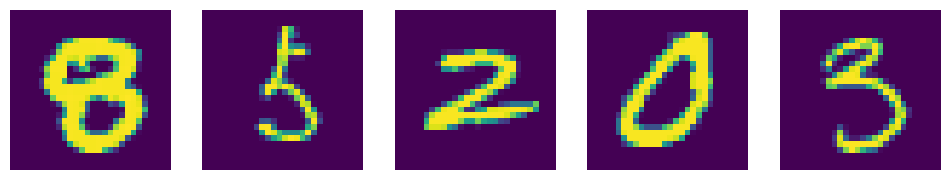

In [8]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

### Let's split the 42,000 images into train and test setsArithmeticError.


In [10]:
split = 0.8, 0.2 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [15]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.9525


In [14]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       901
           1       0.99      0.69      0.81      1368
           2       0.76      0.85      0.80       712
           3       0.80      0.75      0.77       945
           4       0.68      0.76      0.72       735
           5       0.54      0.85      0.66       468
           6       0.92      0.83      0.87       926
           7       0.88      0.85      0.86       915
           8       0.64      0.86      0.73       595
           9       0.66      0.67      0.67       835

    accuracy                           0.79      8400
   macro avg       0.78      0.80      0.78      8400
weighted avg       0.81      0.79      0.79      8400



In [16]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 200, 'alpha': 0.001}


The accuracy score of the best model is 0.919047619047619



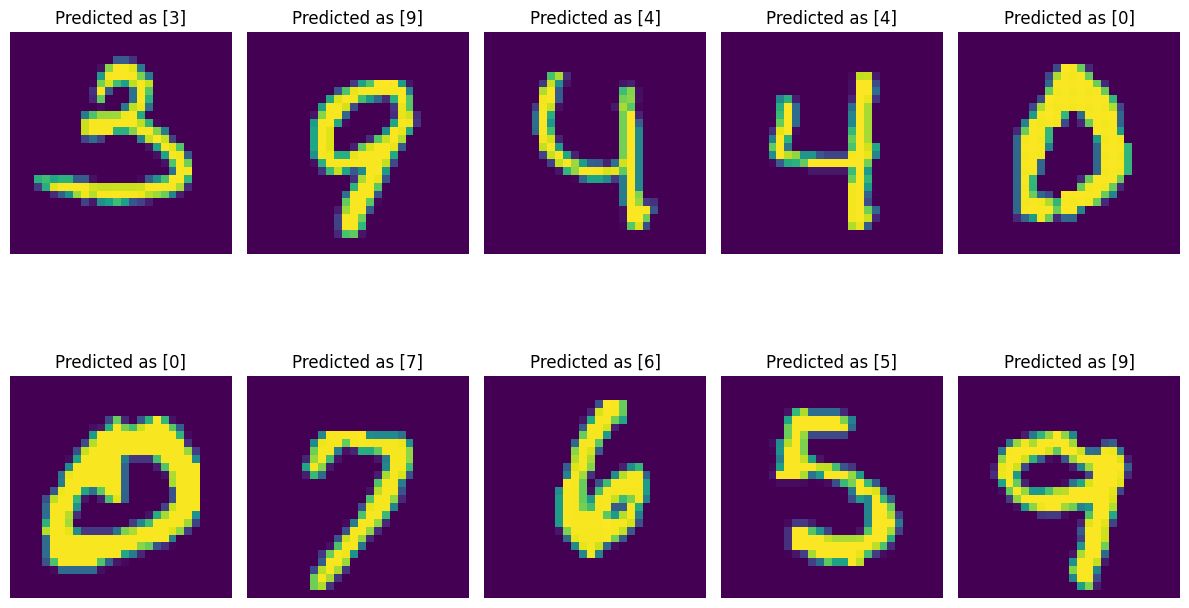

In [17]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()

#### All predictions are correct.